<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importations" data-toc-modified-id="Importations-1">Importations</a></span></li><li><span><a href="#Ajout-de-tout-le-barda" data-toc-modified-id="Ajout-de-tout-le-barda-2">Ajout de tout le barda</a></span></li><li><span><a href="#Vue-des-nans" data-toc-modified-id="Vue-des-nans-3">Vue des nans</a></span></li><li><span><a href="#Vue-globale" data-toc-modified-id="Vue-globale-4">Vue globale</a></span></li><li><span><a href="#Corrélation" data-toc-modified-id="Corrélation-5">Corrélation</a></span></li></ul></div>

In [25]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import math 

In [2]:
plt.rcParams["figure.figsize"] = 15, 10

# Importations

In [3]:
DATA_X = pd.read_csv("Train/Train/X_station_train.csv")
DATA_Y = pd.read_csv("Train/Train/Y_train.csv")
COORDS = pd.read_csv("Other/Other/stations_coordinates.csv")

In [4]:
train = DATA_X.copy()
y = DATA_Y.copy()
coords = COORDS.copy()

# Ajout de tout le barda

In [5]:
train = train.merge(coords, how="left", on="number_sta")

In [6]:
train["month"] = train["date"].replace(to_replace="^.{5}", value="", regex=True)\
                              .replace(to_replace=".{12}$", value="", regex=True)

train["day"] = train["date"].replace(to_replace="^.{8}", value="", regex=True)\
                            .replace(to_replace=".{9}$", value="", regex=True)

train["hour"] = train["date"].replace(to_replace="^.{11}", value="", regex=True)\
                             .replace(to_replace=".{6}$", value="", regex=True)

In [7]:
train = train.astype({"month": "int8", "day": "int8", "hour": "int8"})
train = train.astype({"Id": str, 
                      "number_sta": "category", 
                      "month": "category", 
                      "day": "category", 
                      "hour": "category"})

In [8]:
d_sta = {}
#d_coo = {}
for lat1, lon1, sta1 in zip(coords.lat, coords.lon, coords.number_sta):
    dist = float("inf")
    for lat2, lon2, sta2 in zip(coords.lat, coords.lon, coords.number_sta):
        if lat1 != lat2 and lon1 != lon2:
            p1 = (lat1, lon1)
            p2 = (lat2, lon2)
            mini = min(dist, math.dist(p1, p2))
            if dist > mini and not train.loc[train["number_sta"] == sta2].empty:
                dist = mini
                sta = sta2
                #P1, P2 = p1, p2
    d_sta[sta1] = sta
    #d_coo[P1] = P2

train["voisin"] = train["number_sta"].map(d_sta)

# Vue des nans

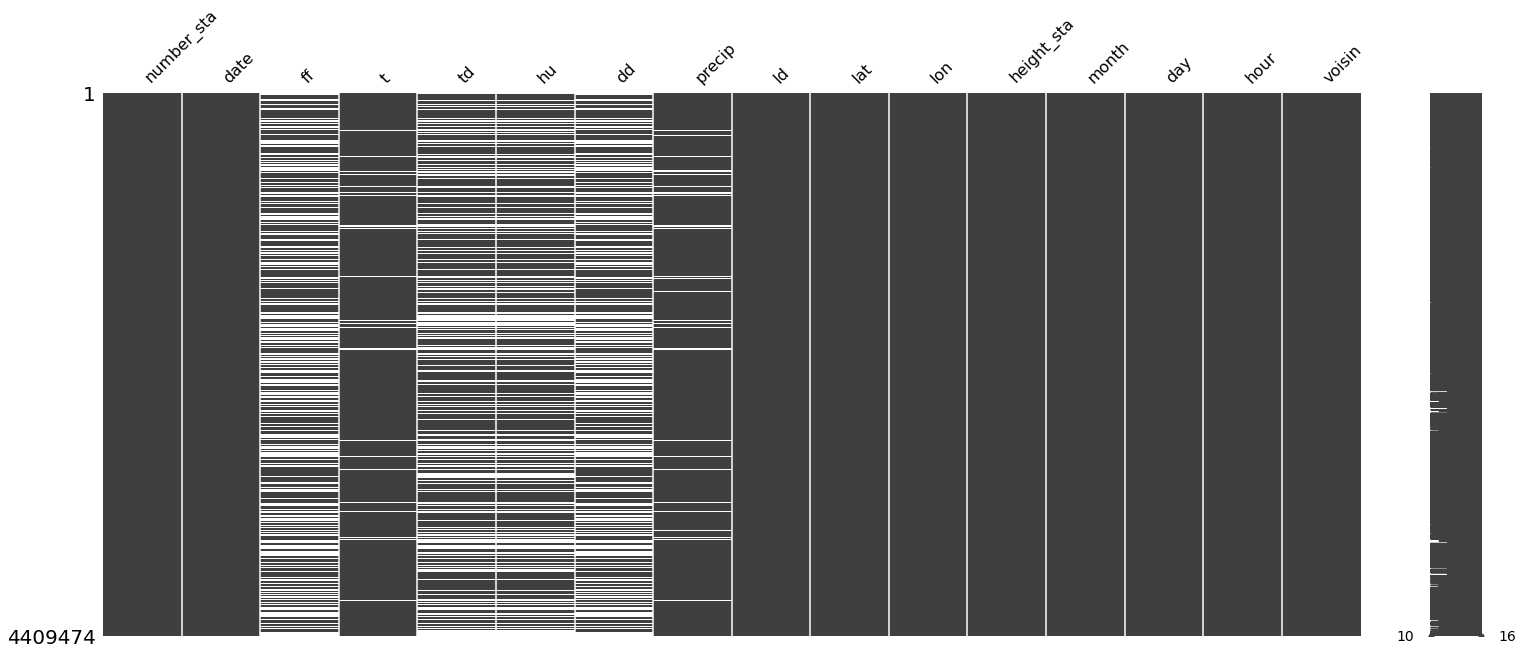

In [9]:
msno.matrix(train);

# Vue globale

Couleurs = $\texttt{month}$

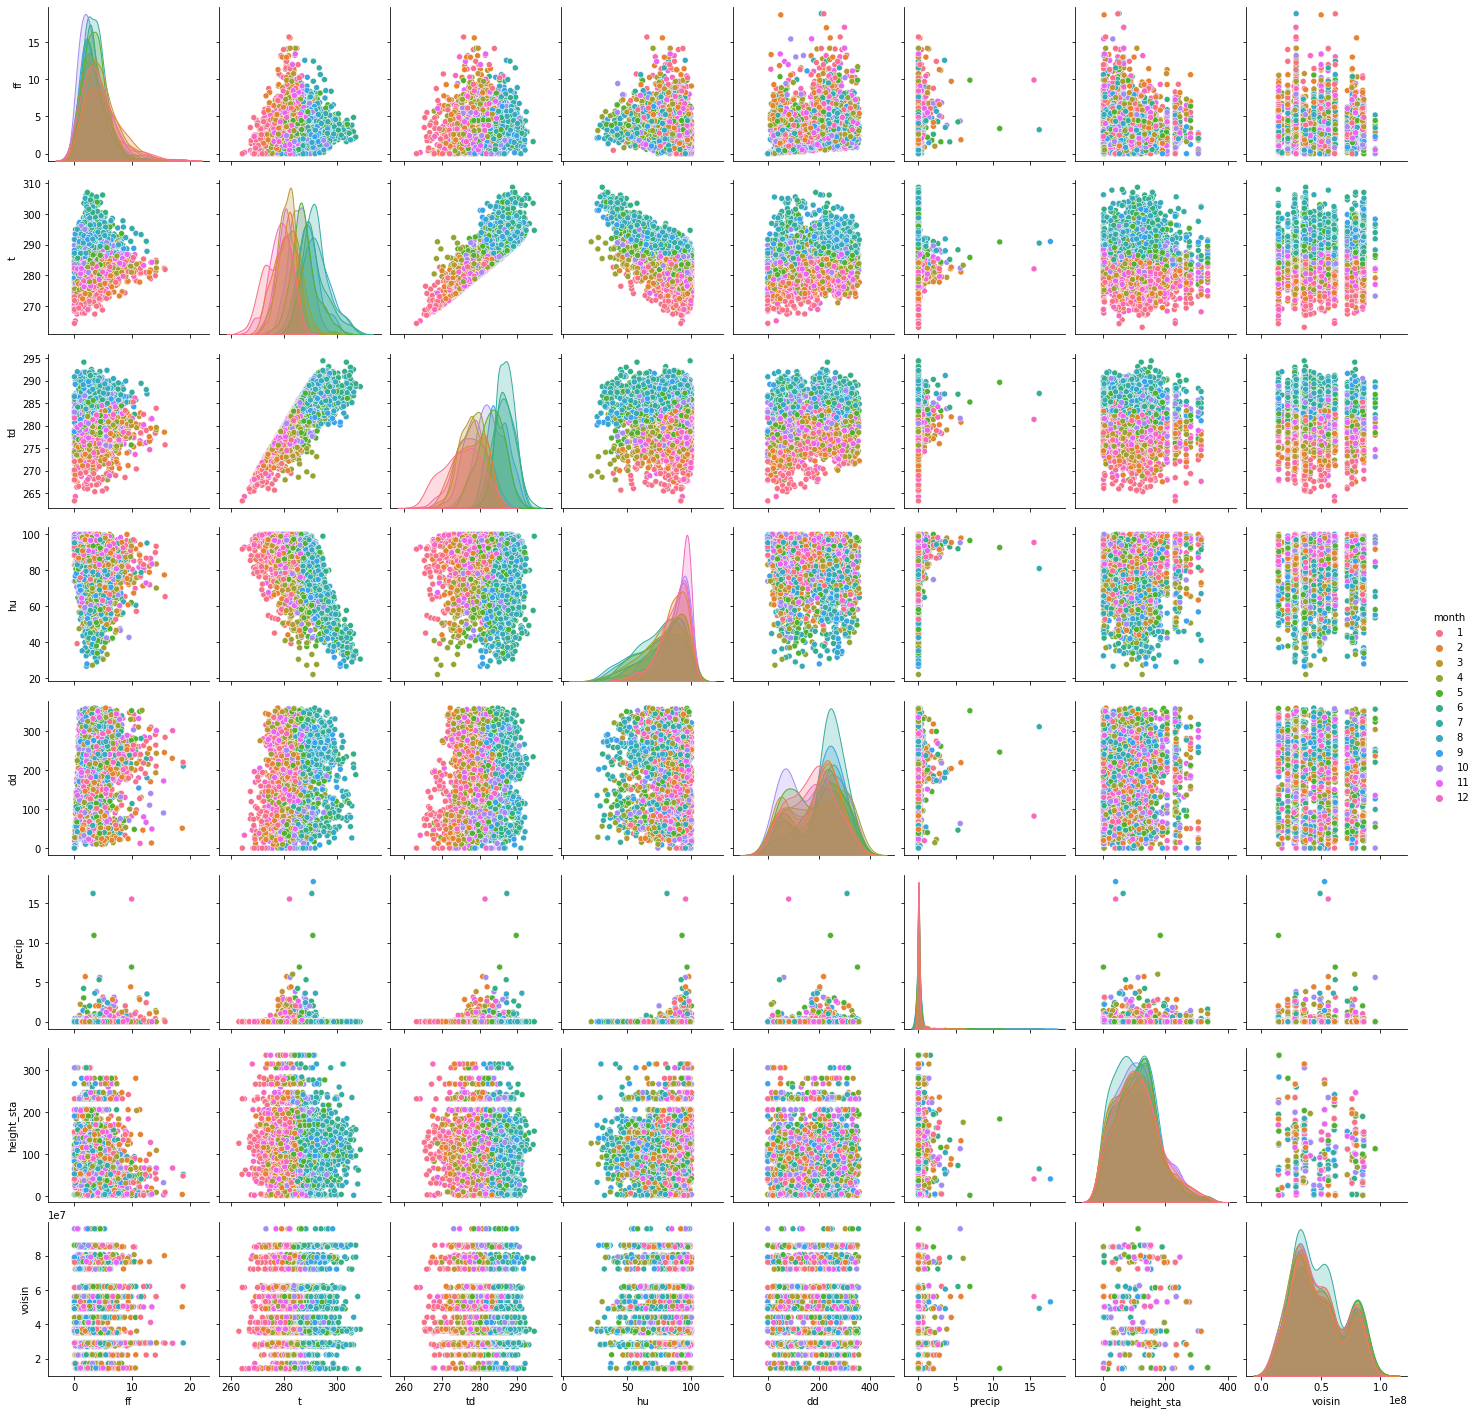

In [10]:
sns.pairplot(train.drop(["lat", "lon"], axis=1).sample(frac=.001), hue="month");

# Corrélation

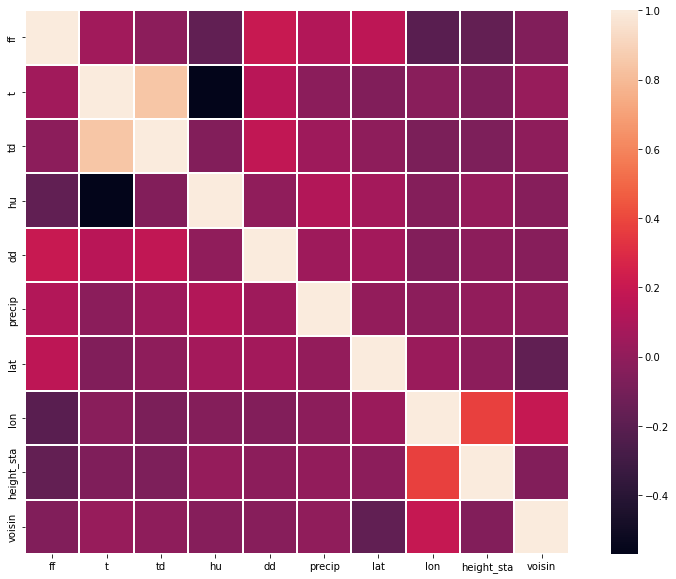

In [11]:
sns.heatmap(train.corr(), square=True, linewidths=1);

In [12]:
train_agg = train.copy()
train_agg["Id"].replace(to_replace=".\d+$", value="", regex=True, inplace=True)
train_agg = train_agg.groupby("Id", as_index=False).agg({
    "number_sta": "first",
    "ff": "median",
    "t": "median",
    "td": "median",
    "hu": "median",
    "dd": "median",
    "precip": "sum",
    "month": "first",
    "day": "first",
    "hour": "first",
    "lat": "first",
    "lon": "first",
    "height_sta": "first"
})

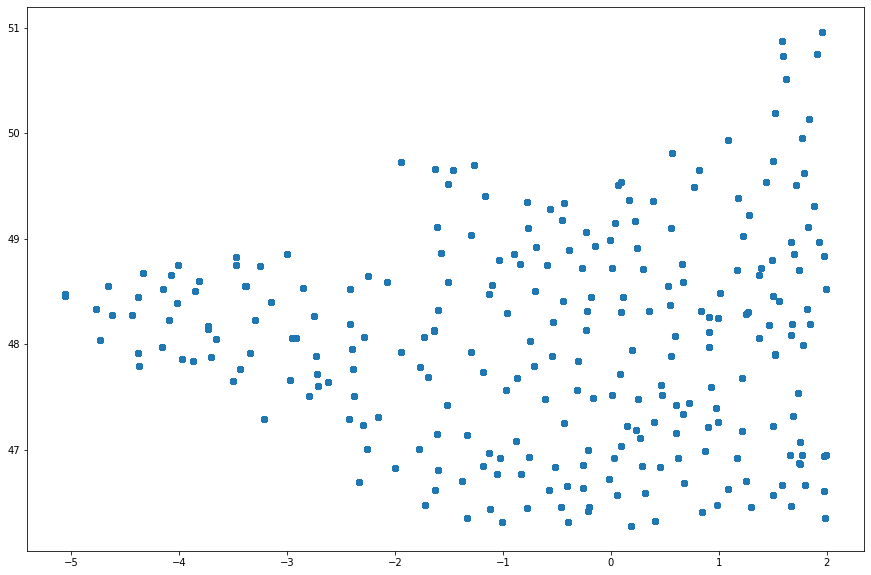

In [13]:
x = train_agg.lon
y = train_agg.lat
h = train_agg.height_sta
plt.plot(x, y, 'o')

In [22]:
train

,number_sta,date,ff,t,td,hu,dd,precip,Id,lat,lon,height_sta,month,day,hour,voisin
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,49.334,-0.431,2.0,1,1,0,14577003
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,49.334,-0.431,2.0,1,1,1,14577003
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,49.334,-0.431,2.0,1,1,2,14577003
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,49.334,-0.431,2.0,1,1,3,14577003
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,49.334,-0.431,2.0,1,1,4,14577003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4409469,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,49.108,1.831,126.0,12,30,19,78140001
4409470,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,49.108,1.831,126.0,12,30,20,78140001
4409471,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,49.108,1.831,126.0,12,30,21,78140001
4409472,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,49.108,1.831,126.0,12,30,22,78140001
